Get the book from url
---

In [1]:
import re
import requests
import numpy as np

link = "https://www.gutenberg.org/ebooks/5200.txt.utf-8"

data = requests.get(link)

data.raise_for_status()

Split the book into several chapters and clean the text for each chapters (specific for each book)
---

In [2]:
# First put all text in lower case
text = data.text.lower()
# Split by roman numbers (chapters)
# The regex search for all roman numbers begin with a \n and ending with a \n
split_by_chapters = re.split(r'\n+\s*[MDCLXVI]+\s*\n', text, flags=re.IGNORECASE)
valid_chapters = split_by_chapters[1:]
valid_chapters[-1] = valid_chapters[-1].split("End of the Project Gutenberg EBook")[0]

Split by word in each chapter
---
>Now, everything works for all books


The regex used is : `"[\"\?\!\-\.\,\;\:\(\)\s]+"` meaning that :

\+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed (greedy)

\" matches the character " literally (case sensitive)

\? matches the character ? literally (case sensitive)

\! matches the character ! literally (case sensitive)

\- matches the character - literally (case sensitive)

\. matches the character . literally (case sensitive)

\, matches the character , literally (case sensitive)

\; matches the character ; literally (case sensitive)

\: matches the character : literally (case sensitive)

\( matches the character ( literally (case sensitive)

\) matches the character ) literally (case sensitive)

\s matches any whitespace character (equal to `[\r\n\t\f\v ]`)

In [3]:
sparse_chapters = []
for chap in valid_chapters:
    splited_chap = re.split(r"[\"\?\!\-\.\,\;\:\(\)\s]+", chap)
    splited_chap = np.unique(splited_chap)
    sparse_chapters.append(splited_chap)

Let's create the graph
---

In [6]:
import networkx as nx
from itertools import combinations

g = nx.Graph()

for chap_words in sparse_chapters:
    nodes = chap_words.copy()
    g.add_nodes_from(nodes)
    for idx in range(len(nodes)-1):
        g.add_edge(nodes[idx], nodes[idx-1])

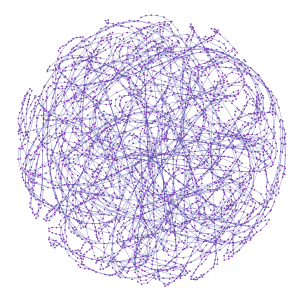

In [7]:
from netwulf import visualize

data = visualize(g)